In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.optimize import minimize
import pdb

In [57]:
def assign_centroids(X, centroids):
    # pdb.set_trace()
    return np.argmin(np.sum((X[:, np.newaxis, :]-centroids)**2, 2), 1)

In [31]:
def compute_centroid(X, cs, K):
    centroids = np.zeros((K, X.shape[1]))
    for i in range(K):
        centroids[i, :] = X[cs == i, :].mean(0)
    return centroids

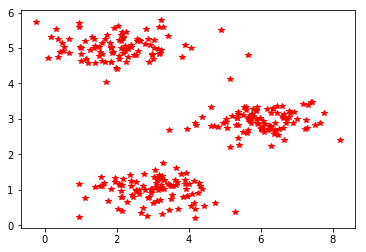

In [35]:
test = sio.loadmat('test8.mat')
X=test['X']
plt.plot(X[:,0],X[:,1],'r*')
plt.show()

In [127]:
def kmeans(X, max_iter, init_centroids=None, K=None):
    if init_centroids == None:
        init_centroids = X[np.random.choice(X.shape[0], K), :]
    cs = init_centroids
    c_trace = init_centroids
    if K == None:
        K = initial_centroids.shape[0]
    for i in range(max_iters):
        # pdb.set_trace()
        assigned_c = assign_centroids(X, cs)
        cs = compute_centroid(X, assigned_c, K)
        c_trace = np.concatenate((c_trace, cs), 0)
    return cs, assigned_c, c_trace

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  


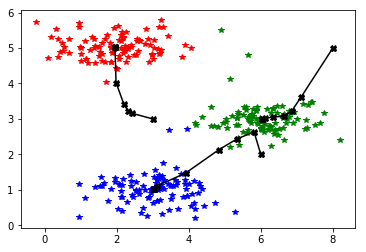

In [89]:
K = 3
max_iters = 10
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
c, idx, trace = kmeans(X, max_iters, initial_centroids)
X1 = X[idx == 1, :]
X0 = X[idx == 0, :]
X2 = X[idx == 2, :]
plt.plot(X0[:, 0], X0[:, 1], 'r*')
plt.plot(X1[:, 0], X1[:, 1], 'b*')
plt.plot(X2[:, 0], X2[:, 1], 'g*')
plt.plot(trace[::3, 0], trace[::3, 1], 'k-X')
plt.plot(trace[1::3, 0], trace[1::3, 1], 'k-X')
plt.plot(trace[2::3, 0], trace[2::3, 1], 'k-X')
plt.show()

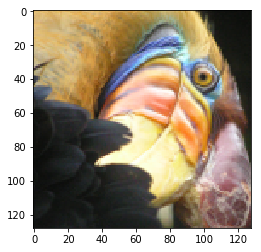

In [81]:
from scipy.ndimage import imread
image = imread('bird_small.png')
plt.imshow(image)
plt.show()

In [83]:
image = image.reshape(image.shape[0]*image.shape[1], 3)

ValueError: cannot reshape array of size 49152 into shape (49152,3)

In [147]:
cs, idx, _ = kmeans(image/255., 40, K=16)

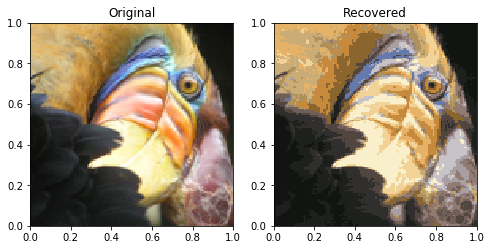

In [151]:
X_ = cs[idx, :]
fig = plt.figure(figsize=(8, 4))

ax1 = fig.add_subplot(121)
ax1.imshow(image.reshape(128, 128, 3), extent=[0, 1, 0, 1])
ax1.set_title('Original')

ax2 = fig.add_subplot(122)
ax2.imshow(X_.reshape(128, 128, 3), extent=[0, 1, 0, 1])
ax2.set_title('Recovered')
plt.show()

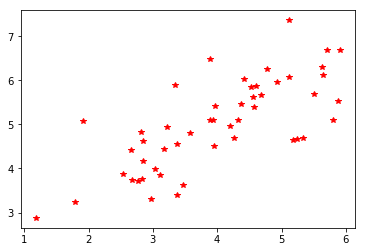

In [4]:
test = sio.loadmat('test9.mat')
X = test['X']
plt.plot(X[:, 0], X[:, 1], 'r*')
plt.show()

In [7]:
X = (X-X.mean(0))/X.std(0)
sigma = 1./len(X[:, 0])*X.T.dot(X)
u, s, v = np.linalg.svd(sigma)
u[:, 0]

array([-0.70710678, -0.70710678])

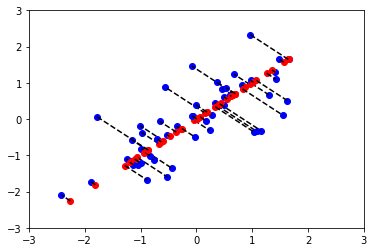

In [20]:
def project(u, X):
    return X.dot(u)


Xproj = project(u[:, 0], (X))
Xproj
Xrecov = Xproj[:, np.newaxis].dot(u[:, 0][np.newaxis, :])
Xrecov
for i in range(len(Xproj)):
    plt.plot(X[i, 0], X[i, 1], 'bo')
    plt.plot(Xrecov[i, 0], Xrecov[i, 1], 'ro')
    temp = np.vstack((Xrecov[i, :], X[i, :]))
    plt.plot(temp[:, 0], temp[:, 1], 'k--')
plt.axis([-3, 3, -3, 3])
plt.show()

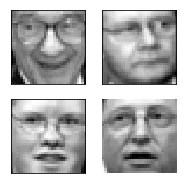

In [47]:
%matplotlib inline
test = sio.loadmat('test10.mat')
X = test['X']
Xn = (X-X.mean(0))/X.std(0)
fig = plt.figure(figsize=(3, 3))
for i in range(4):
    ax = fig.add_subplot(221+i)
    axx = ax.imshow(X[i, :].reshape(32, 32).T, cmap='gray')
    axx.axes.get_xaxis().set_visible(False)
    axx.axes.get_yaxis().set_visible(False)
plt.axis('off')
plt.show()

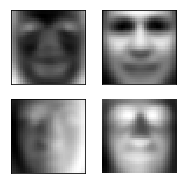

In [48]:
sigma = 1./len(X[:, 0])*X.T.dot(X)
u, s, v = np.linalg.svd(sigma)
fig = plt.figure(figsize=(3, 3))
for i in range(4):
    ax = fig.add_subplot(221+i)
    axx = ax.imshow(u[:, i].reshape(32, 32).T, cmap='gray')
    axx.axes.get_xaxis().set_visible(False)
    axx.axes.get_yaxis().set_visible(False)
plt.axis('off')
plt.show()

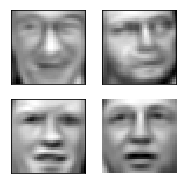

In [49]:
Xproj = project(u[:, 1:100], X)
Xrecov = Xproj.dot(u[:, 1:100].T)
fig = plt.figure(figsize=(3, 3))
for i in range(4):
    ax = fig.add_subplot(221+i)
    axx = ax.imshow(Xrecov[i, :].reshape(32, 32).T, cmap='gray')
    axx.axes.get_xaxis().set_visible(False)
    axx.axes.get_yaxis().set_visible(False)
plt.axis('off')
plt.show()